In [1]:
# Assignment 4 for Professor Wang's PM Data Science class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
# 1. Load in titanic data set
titanic_data = pd.read_csv("../titanic_data.csv", index_col=['PassengerId'])

In [3]:
# 2. Use isNull() to identify the missing values
pd.isnull(titanic_data).any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [4]:
# 3. Fill null values in the age feature on dataset with its mode

# find the mode of the age column
age_mode = titanic_data['Age'].mode()[0]

# fill null age values with age mode
titanic_data['Age'] = titanic_data['Age'].fillna(value=age_mode)

In [5]:
# 4. Drop rows that still contain NA
titanic_cleaned = titanic_data.drop(columns=['Cabin','Embarked'])

pd.isnull(titanic_cleaned).any()

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
dtype: bool

In [6]:
# 6. Calculate the ZScore for SibSp
titanic_cleaned['SibSp_zscore'] = stats.zscore(np.array(titanic_cleaned['SibSp']))

titanic_cleaned['SibSp_zscore'].head()

PassengerId
1    0.432793
2    0.432793
3   -0.474545
4    0.432793
5   -0.474545
Name: SibSp_zscore, dtype: float64

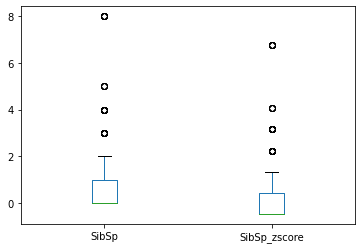

In [7]:
# 7. Find the ourlier for sibsp using both box plot
titanic_cleaned[['SibSp','SibSp_zscore']].plot.box()

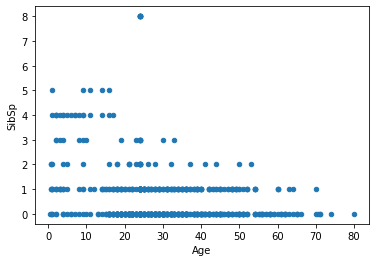

In [8]:
# 8. Find the outlier between age and sibsp using scatter plot
titanic_cleaned[['Age','SibSp']].plot.scatter(x='Age', y='SibSp')

In [9]:
# 9. Find the outlier for sibsp using zscore
titanic_cleaned[(titanic_cleaned['SibSp_zscore'] > 3) | (titanic_cleaned['SibSp_zscore'] < -3)][['SibSp','SibSp_zscore']]

SibSp  SibSp_zscore
PassengerId                     
17               4      3.154809
51               4      3.154809
60               5      4.062148
69               4      3.154809
72               5      4.062148
120              4      3.154809
160              8      6.784163
165              4      3.154809
172              4      3.154809
181              8      6.784163
183              4      3.154809
202              8      6.784163
234              4      3.154809
262              4      3.154809
267              4      3.154809
279              4      3.154809
325              8      6.784163
387              5      4.062148
481              5      4.062148
542              4      3.154809
543              4      3.154809
684              5      4.062148
687              4      3.154809
788              4      3.154809
793              8      6.784163
814              4      3.154809
825              4      3.154809
847              8      6.784163
851              4      3.154809
864              8      6.784163

In [10]:
# 10. Find the outlier for sibsp using IQR

# find first and third quantiles
q1 = titanic_cleaned['SibSp'].quantile(0.25)
q3 = titanic_cleaned['SibSp'].quantile(0.75)

# calculate iqr
IQR = q3 - q1

print((q1-1.5*IQR),(q3+1.5*IQR))

# list rows that are sibsp outliers based on iqr
titanic_cleaned[(titanic_cleaned['SibSp'] < (q1 - 1.5 * IQR)) | (titanic_cleaned['SibSp'] > (q3 + 1.5 * IQR))]['SibSp']

-1.5 2.5


PassengerId
8      3
17     4
25     3
28     3
51     4
60     5
64     3
69     4
72     5
86     3
89     3
120    4
160    8
165    4
172    4
177    3
181    8
183    4
202    8
230    3
234    4
262    4
267    4
279    4
325    8
342    3
375    3
387    5
410    3
481    5
486    3
542    4
543    4
635    3
643    3
684    5
687    4
727    3
788    4
793    8
814    4
820    3
825    4
847    8
851    4
864    8
Name: SibSp, dtype: int64